<a href="https://colab.research.google.com/github/sminiyar/AI_Champion/blob/main/Sudarshan_POC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# note : change the path to your local system
# data = pd.read_csv('pricing_optimization_synthetic_data.csv')
GITHUB_RAW_URL_FOR_FILE = "https://raw.githubusercontent.com/sminiyar/AI_Champion/refs/heads/main/ML_POC/Material_shortage_alert.csv"
df = pd.read_csv(GITHUB_RAW_URL_FOR_FILE)
df

,plant,material_id,material_desc,supplier_id,supplier_name,po_number,po_item,po_order_date,promised_date,actual_delivery_date,...,supplier_otd_rate,supplier_leadtime_mean,supplier_leadtime_std,current_inventory,safety_stock,avg_daily_demand,days_cover,open_po_qty,projected_days_to_stockout,will_shortage_14d
0,GGN,MAT-01029,Material 1029,SUP-0215,Supplier 215,457550634,81,2025-07-08,2025-07-17,2025-07-29,...,0.893,13.8,3.3,367,178,13.2,27.9,24,27.9,0
1,PUN,MAT-01044,Material 1044,SUP-0225,Supplier 225,456743066,68,2025-06-19,2025-07-09,2025-07-09,...,0.913,14.9,4.5,305,118,16.2,18.9,32,18.9,1
2,PUN,MAT-01014,Material 1014,SUP-0218,Supplier 218,452465689,62,2025-04-02,2025-04-11,2025-04-12,...,0.967,16.2,2.1,529,128,25.9,20.4,8,20.4,0
3,GGN,MAT-01008,Material 1008,SUP-0214,Supplier 214,453879190,71,2025-10-23,2025-11-09,2025-11-13,...,0.804,15.3,4.6,68,65,6.8,10.1,0,10.1,1
4,GGN,MAT-01011,Material 1011,SUP-0219,Supplier 219,452737095,44,2025-10-16,2025-11-01,2025-11-03,...,0.818,18.5,3.6,535,57,18.1,29.6,8,29.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,GGN,MAT-01042,Material 1042,SUP-0221,Supplier 221,453742455,18,2025-10-05,2025-10-19,2025-10-23,...,0.978,13.8,5.2,172,100,12.7,13.6,0,13.6,1
196,BLR,MAT-01013,Material 1013,SUP-0216,Supplier 216,452638846,85,2025-02-07,2025-02-19,2025-02-26,...,0.908,9.1,3.3,161,105,13.3,12.1,0,12.1,1
197,GGN,MAT-01004,Material 1004,SUP-0228,Supplier 228,459078886,81,2025-10-08,2025-11-01,2025-10-29,...,0.897,7.3,3.6,584,201,16.1,36.2,9,36.2,0
198,BLR,MAT-01006,Material 1006,SUP-0214,Supplier 214,454681890,19,2025-09-13,2025-09-27,2025-09-24,...,0.826,12.1,3.0,430,131,10.2,42.2,3,42.2,0


In [10]:
print(df.head())
print(df.info())
print(df.isnull().sum())


  plant material_id  material_desc supplier_id supplier_name  po_number  \
0   GGN   MAT-01029  Material 1029    SUP-0215  Supplier 215  457550634   
1   PUN   MAT-01044  Material 1044    SUP-0225  Supplier 225  456743066   
2   PUN   MAT-01014  Material 1014    SUP-0218  Supplier 218  452465689   
3   GGN   MAT-01008  Material 1008    SUP-0214  Supplier 214  453879190   
4   GGN   MAT-01011  Material 1011    SUP-0219  Supplier 219  452737095   

   po_item po_order_date promised_date actual_delivery_date  ...  \
0       81    2025-07-08    2025-07-17           2025-07-29  ...   
1       68    2025-06-19    2025-07-09           2025-07-09  ...   
2       62    2025-04-02    2025-04-11           2025-04-12  ...   
3       71    2025-10-23    2025-11-09           2025-11-13  ...   
4       44    2025-10-16    2025-11-01           2025-11-03  ...   

   supplier_otd_rate  supplier_leadtime_mean  supplier_leadtime_std  \
0              0.893                    13.8                    3.3  

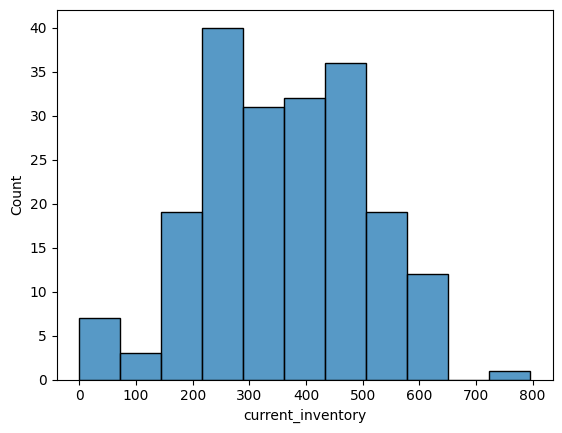

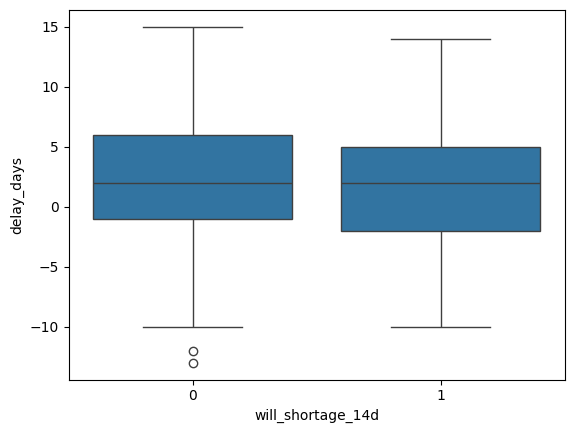

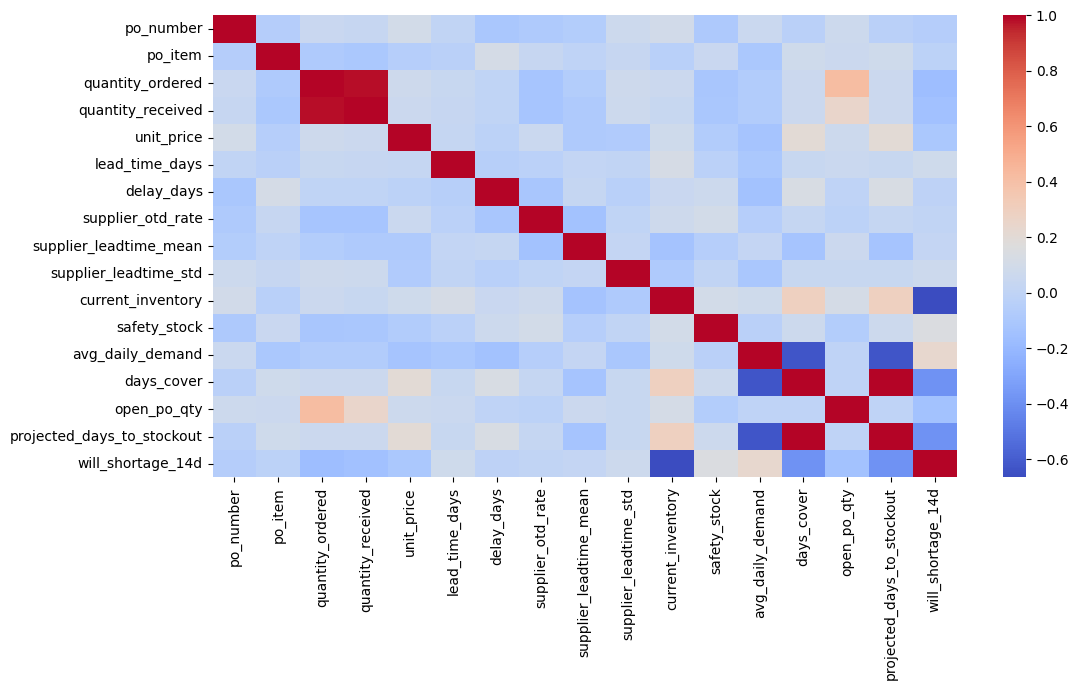

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['current_inventory'])
plt.show()
sns.boxplot(x='will_shortage_14d', y='delay_days', data=df)
plt.show()

# Select only numeric columns for correlation calculation, the original code used all the columns for the heat map which result in error.
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [17]:
df['inventory_buffer'] = df['current_inventory'] - df['safety_stock']
df['demand_variability_index'] = df['supplier_leadtime_std'] * df['avg_daily_demand']
df['risk_days_gap'] = df['days_cover'] - df['projected_days_to_stockout']
df['po_receipt_gap'] = df['quantity_ordered'] - df['quantity_received']
df['delivery_variance'] = df['lead_time_days'] - df['supplier_leadtime_mean']
# Drop highly text columns not needed for ML:
df_model = df.drop([
    'material_desc', 'supplier_name', 'po_number', 'po_item',
    'po_order_date', 'promised_date', 'actual_delivery_date'
], axis=1)